In [1]:
import pickle
import numpy as np
import behavior.behavioral_epoch_tools as bet
import matplotlib.pyplot as plt
from scipy import stats

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))

In [2]:
conditions = ["cagemate", "familiar", "novel"]
sniffing_types = ["anogenital sniffing", "facial sniffing"]

In [3]:
def plot_sniffing(data, ylabel, title):
	x = np.arange(3)
	width = 0.25
	multiplier = 0

	fig, ax = plt.subplots(layout = 'constrained')

	for condition, measurement in data.items():
		offset = width*multiplier
		rects = ax.bar(x + offset, measurement['mean'], width, yerr=measurement['sem'], label = condition)
		ax.bar_label(rects, padding = 2)
		multiplier += 1
	
	ymax = 0.0
	for m in data.values():
		means = np.asarray(m['mean'], dtype=float)
		sems  = np.nan_to_num(np.asarray(m['sem'], dtype=float), nan=0.0)
		ymax = max(ymax, float(np.max(means + sems)))

	plt.ylim(0, (ymax * 1.15) if ymax > 0 else 1.0)
	ax.set_ylabel(ylabel)
	ax.set_title(title)
	ax.set_xticks(x + 0.125, conditions)
	ax.legend(loc='best')
	plt.show()

In [4]:
anogenital_behavior_dicts = unpickle_this(r"C:\Users\zhaoz\Desktop\Research\SocialMemory\diff_fam_social_memory_ephys\other_peoples_sutff\Catherine\data_analysis\anogenital_behavior_dicts.pkl")
facial_behavior_dicts = unpickle_this(r"C:\Users\zhaoz\Desktop\Research\SocialMemory\diff_fam_social_memory_ephys\other_peoples_sutff\Catherine\data_analysis\facial_behavior_dicts.pkl")
print(anogenital_behavior_dicts)
print(len(anogenital_behavior_dicts))
print(facial_behavior_dicts)
print(len(facial_behavior_dicts))

{'23_CNF_merged.rec': {'cagemate': array([[ 615811.  ,  616434.65],
       [ 620754.2 ,  621700.95],
       [ 950429.25,  951191.45],
       [1091164.3 , 1091926.5 ],
       [1172306.95, 1172999.9 ],
       [1175217.25, 1175840.9 ],
       [1217278.4 , 1219773.  ],
       [1221574.6 , 1222406.15]]), 'familiar': array([[1822002.6 , 1824012.1 ],
       [1830040.65, 1832050.15],
       [1845008.05, 1846047.45],
       [1851036.55, 1853046.1 ],
       [1889009.4 , 1890048.8 ],
       [1940009.4 , 1944998.5 ],
       [1953036.55, 1954006.65],
       [1962044.7 , 1963014.85],
       [1971052.85, 1972023.  ],
       [1978051.5 , 1980061.  ],
       [1984010.75, 1985050.15],
       [2060995.8 , 2062035.2 ],
       [2074023.  , 2074993.1 ],
       [2180042.  , 2182051.5 ],
       [2220999.85, 2223003.95],
       [2274017.4 , 2275043.35],
       [2325003.95, 2326043.35],
       [2332071.9 , 2333042.  ],
       [2335051.5 , 2336021.6 ]]), 'novel': array([[1217278.4 , 1219773.  ],
       [1221574.

In [5]:
total_length_dicts = {}

for rec in anogenital_behavior_dicts.keys():
	total_length_dicts[rec] = {}
	for condition in conditions:
		total_length_dicts[rec][condition] = {}
		# Anogenital sniffing
		if anogenital_behavior_dicts[rec][condition].size != 0:
			total_length_dicts[rec][condition][sniffing_types[0]] = anogenital_behavior_dicts[rec][condition][:, 1] - \
																anogenital_behavior_dicts[rec][condition][:, 0]
		else:
			total_length_dicts[rec][condition][sniffing_types[0]] = np.array([0])
		
		# Facial sniffing
		if facial_behavior_dicts[rec][condition].size != 0:
			total_length_dicts[rec][condition][sniffing_types[1]] = facial_behavior_dicts[rec][condition][:, 1] - \
																facial_behavior_dicts[rec][condition][:, 0]
		else:
			total_length_dicts[rec][condition][sniffing_types[1]] = np.array([0])
print(total_length_dicts)

{'23_CNF_merged.rec': {'cagemate': {'anogenital sniffing': array([ 623.65,  946.75,  762.2 ,  762.2 ,  692.95,  623.65, 2494.6 ,
        831.55]), 'facial sniffing': array([1108.7 ,  623.65, 1732.35, 1503.3 ,  623.65, 1940.2 ])}, 'familiar': {'anogenital sniffing': array([2009.5 , 2009.5 , 1039.4 , 2009.55, 1039.4 , 4989.1 ,  970.1 ,
        970.15,  970.15, 2009.5 , 1039.4 , 1039.4 ,  970.1 , 2009.5 ,
       2004.1 , 1025.95, 1039.4 ,  970.1 ,  970.1 ]), 'facial sniffing': array([2009.5 , 1039.4 , 2009.5 ,  970.1 , 2009.5 , 2009.5 , 2009.5 ,
        970.15,  970.15, 2979.65, 1039.4 ,  970.1 , 3949.75, 3949.75,
        981.15, 4989.15, 1039.4 , 3949.75, 3949.7 ,  970.1 , 2009.55,
       2009.5 ,  970.1 , 1024.65,  970.1 ,  970.1 , 2009.5 , 2009.5 ,
       2009.5 ,  970.1 ,  970.1 ,  970.15, 2009.5 , 2009.5 ,  970.1 ,
        970.1 , 4019.05, 2009.5 , 2979.65,  970.1 , 4019.  ])}, 'novel': {'anogenital sniffing': array([2494.6 ,  831.55, 1247.3 , 2009.5 , 1455.15,  692.95, 1178.  ,
    

In [6]:
cagemate_array = {'anogenital sniffing': [],
				  'facial sniffing': [],
				  }
familiar_array = {'anogenital sniffing': [],
				  'facial sniffing': [],
				  }
novel_array = {'anogenital sniffing': [],
				  'facial sniffing': [],
				  }

for rec, behaviors in total_length_dicts.items():
	for sniffing_type in sniffing_types:
		cagemate_array[sniffing_type].append(total_length_dicts[rec]['cagemate'][sniffing_type])
		familiar_array[sniffing_type].append(total_length_dicts[rec]['familiar'][sniffing_type])
		novel_array[sniffing_type].append(total_length_dicts[rec]['novel'][sniffing_type])

print(cagemate_array)
print()
print(familiar_array)
print()
print(novel_array)

{'anogenital sniffing': [array([ 623.65,  946.75,  762.2 ,  762.2 ,  692.95,  623.65, 2494.6 ,
        831.55]), array([2009.55, 2979.6 ,  970.1 ,  970.1 ,  970.1 , 1039.4 , 1039.4 ,
        970.1 , 1039.4 , 3048.9 , 3048.9 , 2009.55, 2009.5 , 2979.6 ,
        970.1 , 1039.4 ,  970.15, 2979.65, 1039.4 , 2009.5 ,  970.1 ,
        970.1 , 2979.6 , 2009.5 ,  970.1 , 2009.5 , 1039.4 , 1039.4 ,
       6998.6 ,  970.15]), array([ 970.1 ,  970.1 ,  970.1 ,  970.9 , 1039.4 ,  970.15, 6028.55,
        970.1 ,  970.1 , 1039.4 ,  970.1 , 1039.4 ,  975.25,  970.1 ,
        970.1 , 1039.4 ,  970.1 ,  970.15, 1039.4 ]), array([ 831.55, 1178.  ]), array([1316.6 , 1108.7 ,  623.65]), array([ 762.25, 1663.05,  623.6 ]), array([ 762.25,  554.35, 1385.9 , 2494.55, 1247.25, 1247.3 , 1039.4 ,
        970.1 ]), array([ 676.05,  554.35,  554.35,  692.9 , 1108.7 ,  692.95,  554.35,
       8938.85]), array([2009.5,  970.1]), array([1039.4 ,  970.1 , 1039.4 , 1039.4 ,  970.1 ,  977.45, 1039.4 ,
       2979.6 , 

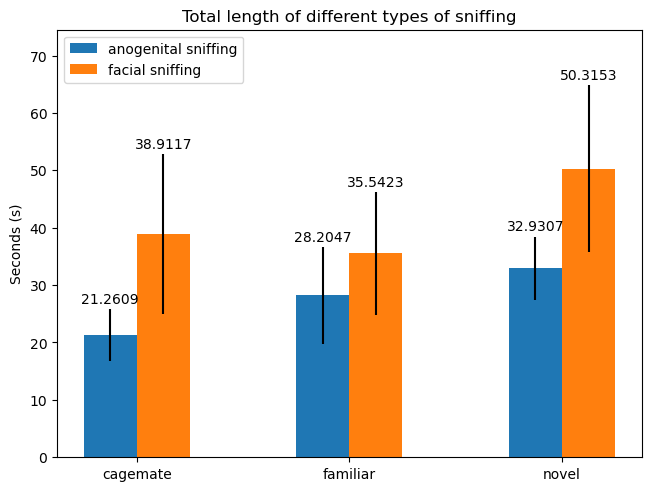

In [7]:
# Total length

total_length_data = {
	"anogenital sniffing":{
		"mean": (
			np.mean([sum(event) for event in cagemate_array['anogenital sniffing']])/1000,
			np.mean([sum(event) for event in familiar_array['anogenital sniffing']])/1000,
			np.mean([sum(event) for event in novel_array['anogenital sniffing']])/1000
		),
		"sem": (
			stats.sem([sum(event) for event in cagemate_array['anogenital sniffing']])/1000,
			stats.sem([sum(event) for event in familiar_array['anogenital sniffing']])/1000,
			stats.sem([sum(event) for event in novel_array['anogenital sniffing']])/1000
		)
	},

	"facial sniffing": {
		"mean": (
			np.mean([sum(event) for event in cagemate_array['facial sniffing']]) / 1000,
			np.mean([sum(event) for event in familiar_array['facial sniffing']]) / 1000,
			np.mean([sum(event) for event in novel_array['facial sniffing']]) / 1000
    	),
    	"sem": (
			stats.sem([sum(event) for event in cagemate_array['facial sniffing']]) / 1000,
			stats.sem([sum(event) for event in familiar_array['facial sniffing']]) / 1000,
			stats.sem([sum(event) for event in novel_array['facial sniffing']]) / 1000
    	)
	}
}
plot_sniffing(total_length_data, 'Seconds (s)', 'Total length of different types of sniffing')

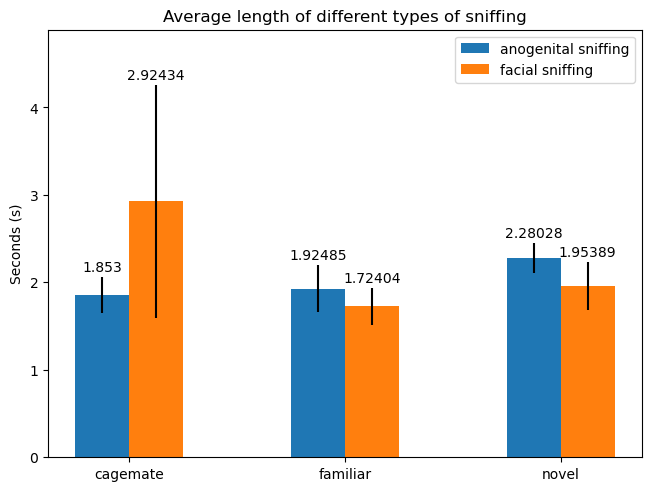

In [8]:
# Average length

aver_length_data = {
	"anogenital sniffing":{
		"mean": (
			np.mean([sum(event)/len(event) for event in cagemate_array['anogenital sniffing']])/1000,
			np.mean([sum(event)/len(event) for event in familiar_array['anogenital sniffing']])/1000,
			np.mean([sum(event)/len(event) for event in novel_array['anogenital sniffing']])/1000
		),
		"sem": (
			stats.sem([sum(event)/len(event) for event in cagemate_array['anogenital sniffing']])/1000,
			stats.sem([sum(event)/len(event) for event in familiar_array['anogenital sniffing']])/1000,
			stats.sem([sum(event)/len(event) for event in novel_array['anogenital sniffing']])/1000
		)
	},

	"facial sniffing": {
		"mean": (
			np.mean([sum(event)/len(event) for event in cagemate_array['facial sniffing']]) / 1000,
			np.mean([sum(event)/len(event) for event in familiar_array['facial sniffing']]) / 1000,
			np.mean([sum(event)/len(event) for event in novel_array['facial sniffing']]) / 1000
    	),
    	"sem": (
			stats.sem([sum(event)/len(event) for event in cagemate_array['facial sniffing']]) / 1000,
			stats.sem([sum(event)/len(event) for event in familiar_array['facial sniffing']]) / 1000,
			stats.sem([sum(event)/len(event) for event in novel_array['facial sniffing']]) / 1000
    	)
	}
}
plot_sniffing(aver_length_data, 'Seconds (s)', 'Average length of different types of sniffing')

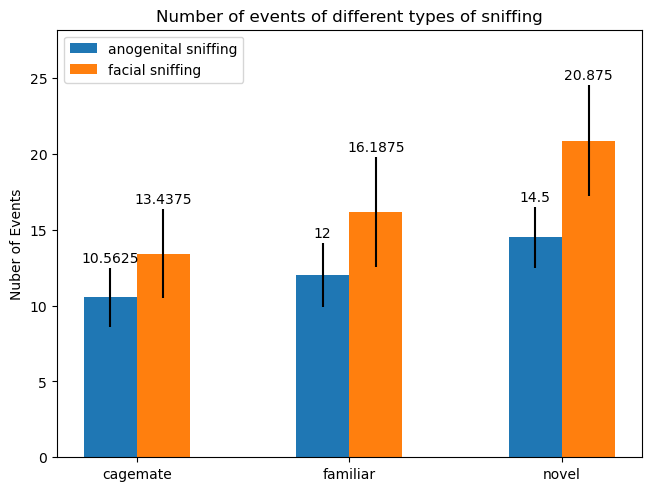

In [9]:
# Number of Events

n_o_events_data = {
	"anogenital sniffing":{
		"mean": (
			np.mean([len(event) for event in cagemate_array['anogenital sniffing']]),
			np.mean([len(event) for event in familiar_array['anogenital sniffing']]),
			np.mean([len(event) for event in novel_array['anogenital sniffing']])
		),
		"sem": (
			stats.sem([len(event) for event in cagemate_array['anogenital sniffing']]),
			stats.sem([len(event) for event in familiar_array['anogenital sniffing']]),
			stats.sem([len(event) for event in novel_array['anogenital sniffing']])
		)
	},

	"facial sniffing": {
		"mean": (
			np.mean([len(event) for event in cagemate_array['facial sniffing']]),
			np.mean([len(event) for event in familiar_array['facial sniffing']]),
			np.mean([len(event) for event in novel_array['facial sniffing']])
    	),
    	"sem": (
			stats.sem([len(event) for event in cagemate_array['facial sniffing']]),
			stats.sem([len(event) for event in familiar_array['facial sniffing']]),
			stats.sem([len(event) for event in novel_array['facial sniffing']])
    	)
	}
}
plot_sniffing(n_o_events_data, 'Nuber of Events', 'Number of events of different types of sniffing')